In [150]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import cv2

SEED = 1

In [92]:
df = pd.read_csv("94_character_TMNIST.csv", nrows=250000)
#df = df[df['labels'].str.contains('[A-Z]')]
df = df[df['labels'].str.isupper()]
df = df[df['names'].str.contains('sans', case=False)]

In [97]:
le=LabelEncoder()
df = df.assign(labels = le.fit_transform(df['labels']))

In [166]:
# labels to predict
y = df.labels.values
# normalize features
X = df.iloc[:,2:].values/255
X = X.reshape(-1, 28, 28, 1)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)
#X_train, X_test, y_train, y_test = torch.from_numpy(X_train), torch.from_numpy(X_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


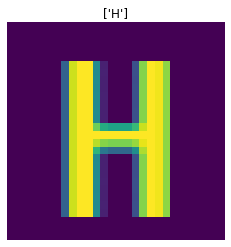

In [168]:
plt.imshow(X[4000])
plt.axis("off")
plt.title(str(le.inverse_transform([y[4000]])))
plt.show()

In [169]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 1600)              0         
                                                                 
 dense_35 (Dense)            (None, 64)              

In [170]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the images to (28, 28, 1)
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
print(X_train.shape)

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 26)
y_test = to_categorical(y_test, 26)
print(y_train.shape)

(6593, 28, 28, 1)
(6593, 26)


In [171]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
165/165 [==============================] - 6s 25ms/step - loss: 3.2585 - accuracy: 0.0410 - val_loss: 3.2586 - val_accuracy: 0.0311
Epoch 2/10
165/165 [==============================] - 4s 21ms/step - loss: 3.2333 - accuracy: 0.0592 - val_loss: 3.0941 - val_accuracy: 0.0599
Epoch 3/10
165/165 [==============================] - 5s 32ms/step - loss: 2.1545 - accuracy: 0.4850 - val_loss: 1.2134 - val_accuracy: 0.7627
Epoch 4/10
165/165 [==============================] - 5s 32ms/step - loss: 0.8140 - accuracy: 0.8405 - val_loss: 0.5355 - val_accuracy: 0.8954
Epoch 5/10
165/165 [==============================] - 5s 30ms/step - loss: 0.4503 - accuracy: 0.9056 - val_loss: 0.3638 - val_accuracy: 0.9249
Epoch 6/10
165/165 [==============================] - 5s 29ms/step - loss: 0.3259 - accuracy: 0.9268 - val_loss: 0.3072 - val_accuracy: 0.9287
Epoch 7/10
165/165 [==============================] - 5s 29ms/step - loss: 0.2551 - accuracy: 0.9410 - val_loss: 0.2307 - val_accuracy: 0.9500

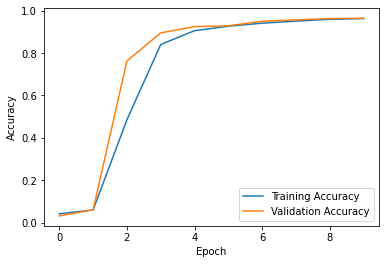

In [172]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [173]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test set loss: {loss:.4f}')
print(f'Test set accuracy: {accuracy:.4f}')

52/52 [==============================] - 0s 7ms/step - loss: 0.1511 - accuracy: 0.9630
Test set loss: 0.1511
Test set accuracy: 0.9630


In [175]:
# Load and preprocess the image
img = cv2.imread('letter_H.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = np.expand_dims(img, axis=-1)
img = img / 255.0

# Get the predicted class probabilities
probs = model.predict(np.array([img]))

# Get the index of the class with the highest probability
pred_idx = np.argmax(probs)

# Map the index to the corresponding letter label
#label = [k for k, v in train_generator.class_indices.items() if v == pred_idx][0]

print("Predicted letter: ")
print(chr(ord('A')+pred_idx))

1/1 [==============================] - 6s 6s/step
Predicted letter: 
H


feiyang stuff


In [176]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

In [177]:
def find_grid(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    tiles = []
    for c in contours:
        area = cv2.contourArea(c)
        if area > 1000 and area < 5000:
            #calculate accuracy as a percent of contour perimeter
            tiles.append(c)
            accuracy=0.03*cv2.arcLength(c,True)
            approx=cv2.approxPolyDP(c,accuracy,True)
            cv2.drawContours(image,[approx],0,(0,255,0),2)
            cv2.imshow('Approx polyDP', image)

    cv2.imshow("Final Image", image)
    plt.imshow(image)
    return tiles

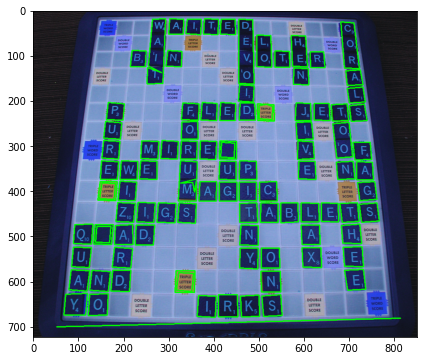

In [178]:
test_path = 'data/board2.png'
test_img = cv2.imread(test_path)

g = find_grid(test_img)

In [179]:
import math
def crop_contour(contours, img):
    img_arr = []
    rows = math.ceil(len(g)/6)
    num = 0
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        ROI = img[y:y+h, x:x+w]
        img_arr.append(ROI)
        plt.subplot(rows,6,num+1)
        plt.axis('off')
        plt.imshow(ROI)
        num += 1
    return img_arr


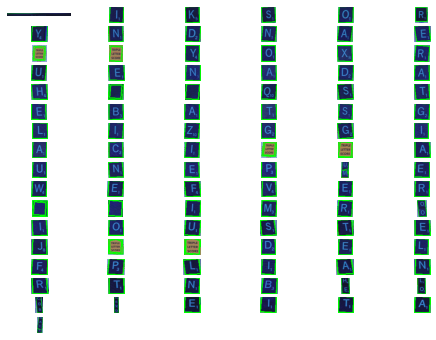

In [186]:
rgb_images = crop_contour(g, test_img)

In [189]:
imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in rgb_images]
imgs = [cv2.resize(img, (28, 28)) for img in imgs]
imgs = np.array([np.expand_dims(img, axis=-1)/255.0 for img in imgs])

# Get the predicted class probabilities for all the images
probs = model.predict(imgs)

# Get the indices of the classes with the highest probability for all the images
pred_indices = np.argmax(probs, axis=1)

# Map the indices to the corresponding letter labels
labels = [chr(ord('A')+i) for i in pred_indices]

print("Predicted letters: ")
print(labels)

4/4 [==============================] - 0s 5ms/step
Predicted letters: 
['E', 'X', 'N', 'X', 'W', 'X', 'X', 'X', 'W', 'X', 'X', 'X', 'N', 'N', 'X', 'M', 'X', 'X', 'X', 'X', 'N', 'X', 'X', 'X', 'N', 'D', 'Z', 'X', 'X', 'X', 'E', 'X', 'X', 'X', 'X', 'W', 'N', 'X', 'N', 'N', 'N', 'X', 'X', 'N', 'X', 'N', 'N', 'X', 'M', 'X', 'X', 'N', 'W', 'N', 'W', 'N', 'X', 'X', 'N', 'X', 'D', 'X', 'X', 'X', 'X', 'M', 'X', 'M', 'X', 'X', 'X', 'X', 'X', 'B', 'X', 'M', 'K', 'N', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'W', 'M', 'N', 'X', 'X', 'X', 'X', 'W']


In [ ]:
img = cv2.resize(img, (28, 28))
img = np.expand_dims(img, axis=-1)
img = img / 255.0

# Get the predicted class probabilities
probs = model.predict(np.array([img]))

# Get the index of the class with the highest probability
pred_idx = np.argmax(probs)

# Map the index to the corresponding letter label
#label = [k for k, v in train_generator.class_indices.items() if v == pred_idx][0]

print("Predicted letter: ")
print(chr(ord('A')+pred_idx))

trash 

In [127]:
from keras.datasets import mnist
(x_train_m, y_train_m_start), (x_test_m, y_test_m_start) = mnist.load_data()
x_train_m[0].shape
X_train_m = x_train_m.astype('float32') / 255.0
X_test_m = x_test_m.astype('float32') / 255.0

# Reshape the images to (28, 28, 1)
X_train_m = np.reshape(X_train_m, (len(X_train_m), 28, 28, 1))
X_test_m = np.reshape(X_test_m, (len(X_test_m), 28, 28, 1))
print(X_train_m.shape)

# Convert the labels to one-hot encoded vectors
y_train_m = to_categorical(y_train_m_start, 26)
y_test_m = to_categorical(y_test_m_start, 26)
print(y_train_m.shape)

(60000, 28, 28, 1)
(60000, 26)


In [83]:

from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from sklearn.metrics import roc_auc_score, accuracy_score
'''
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))



'''
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(94, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten_5 (Flatten)         (None, 1600)             

ValueError: in user code:

    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 94) are incompatible


In [81]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test set loss: {loss:.4f}')
print(f'Test set accuracy: {accuracy:.4f}')

52/52 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0352
Test set loss: 0.0000
Test set accuracy: 0.0352


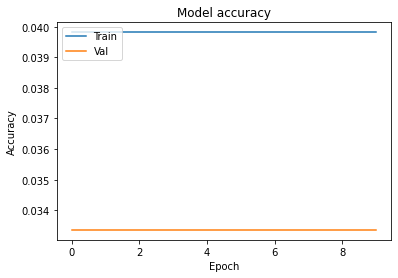

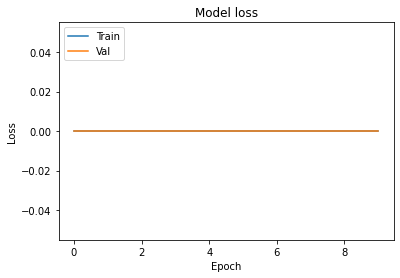

In [82]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

test other